In [1]:
!pip install transformers[torch] -q
!pip install umap-learn numpy matplotlib -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
import warnings
# To ignore all warnings (not recommended unless you're sure about the consequences)
warnings.filterwarnings("ignore")

In [3]:
import torch
import pandas as pd
import numpy as np
import os
from transformers import AutoTokenizer,AutoModelForMaskedLM
from transformers import pipeline

In [4]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [5]:
model1=AutoModelForMaskedLM.from_pretrained('sampathlonka/San-BERT')
model1

config.json:   0%|          | 0.00/870 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [6]:
model1.bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [7]:
tokenizer1=AutoTokenizer.from_pretrained('sampathlonka/San-BERT')
tokenizer1

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/472k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/951k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

BertTokenizerFast(name_or_path='sampathlonka/San-BERT', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [8]:
import re

In [9]:
#df.to_csv('cleaned.csv')
data = pd.read_excel('/content/manipulated_data.xlsx')

In [10]:
embedding=[]

In [12]:
df=data

In [13]:
for i in range(len(df)):
    with torch.no_grad():
        t = tokenizer1.encode(df.Text[i][0],max_length=512, padding=True, truncation=True, return_tensors="pt")
        model_output = model1.bert(t).last_hidden_state
        model_output = model_output.squeeze()
        out = torch.mean(model_output,dim=0)
        out_numpy = out.numpy()
        embedding.append(out_numpy)

In [14]:
embedding[500].shape

(768,)

In [15]:
data= np.array(embedding)
data

array([[-0.96271306, -1.3908592 , -0.5929441 , ...,  0.02827221,
        -0.8196437 , -0.35851502],
       [-0.9627138 , -1.390859  , -0.59294325, ...,  0.02827181,
        -0.8196444 , -0.35851502],
       [-0.962714  , -1.3908597 , -0.5929442 , ...,  0.02827177,
        -0.81964415, -0.3585154 ],
       ...,
       [-0.962714  , -1.3908592 , -0.5929437 , ...,  0.02827153,
        -0.81964415, -0.3585154 ],
       [-0.9627135 , -1.390858  , -0.5929436 , ...,  0.02827241,
        -0.81964403, -0.3585156 ],
       [-0.9627139 , -1.3908587 , -0.5929435 , ...,  0.02827214,
        -0.819644  , -0.35851535]], dtype=float32)

In [16]:
data.shape

(1031, 768)

## t-SNE Visualization

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Create a t-SNE object
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)

# Apply t-SNE to the scaled data
tsne_result = tsne.fit_transform(data)

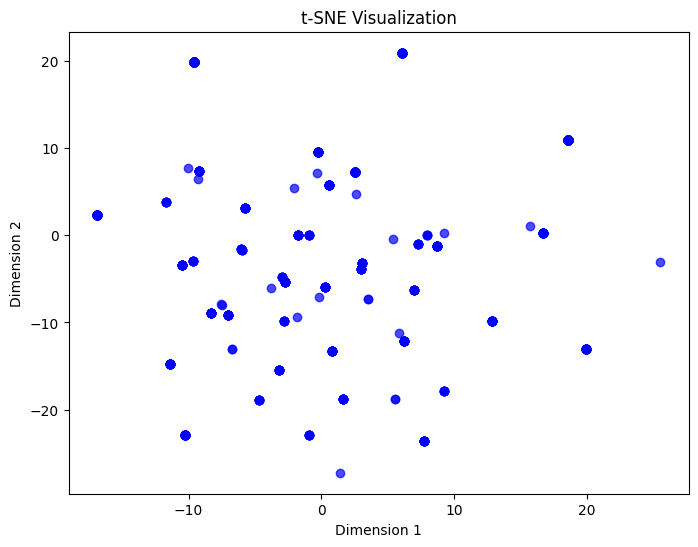

In [18]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], marker='o', c='b', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()